In [1]:
import os
os.chdir('E:/final_dataset/')
import numpy as np
import pandas as pd
import pickle
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
import matplotlib
from scipy import sparse
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.optimize import minimize
from scipy import stats
import scanpy as sc
import anndata
sc.settings.set_figure_params(dpi=100, facecolor='white')
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
import scanpy.external as sce
import sys
import pingouin as pg
%matplotlib inline
sc.logging.print_header()
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
sns.set_style("ticks")
from scipy.optimize import minimize
from scipy import stats
import rnaseqTools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import umap
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from statannot import add_stat_annotation

scanpy==1.9.1 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
pseq = sc.read_h5ad('pseq.h5ad')

In [3]:
ba = sc.read_h5ad('bushy_atoh7_reclustered.h5ad')
pba =  sc.read_h5ad('pseq_bushy_atoh7_remapped.h5ad')

bh = sc.read_h5ad('bushy_hhip_reclustered.h5ad')
pbh =  sc.read_h5ad('pseq_bushy_hhip_remapped.h5ad')

In [4]:
efeatures = ['Tau (ms)', 'SagRatio', 'Rebound (mV)', 
             'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 
             'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)',
             'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 
             'Max Spike Number']
mfeatures = ['branch_points', 'width', 'depth', 'width_depth_ratio', 'squareness', 
               'height','tips', 'stems', 'total_length', 'avg_thickness', 
               'max_thickness', 'total_surface', 'total_volume', 'max_path_dist_to_soma',
               'max_branch_order', 'max_path_angle', 'min_path_angle', 'median_path_angle', 'mean_soma_exit_angle',
               'max_segment_path_length', 'median_intermediate_segment_pl', 'median_terminal_segment_pl', 'log_max_tortuosity',
               'log_min_tortuosity', 'log_median_tortuosity', 'max_branch_angle', 'min_branch_angle', 'mean_branch_angle',
               'max_degree', 'tree_asymmetry', 'stem_max', 'stem_mean', 'stem_min', 'dist_to_dorsal',
               'soma_perimeter', 'soma_area', 'soma_feret_max', 'soma_feret_min', 'soma_aspect_ratio',
               'soma_compactness', 'soma_convexity', 'soma_form_factor', 'soma_roundness', 'soma_solidity']

In [5]:
for m in mfeatures:
    pba.obs[m] = pseq.obs[m]
    pbh.obs[m] = pseq.obs[m]

In [6]:
ba.uns['subclusters_colors'] =  ['#279e68','#1f77b4','#ff7f0e']

In [45]:
pbh

AnnData object with n_obs × n_vars = 67 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)'

In [44]:
pba

AnnData object with n_obs × n_vars = 110 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)

In [43]:
bh

AnnData object with n_obs × n_vars = 846 × 18727
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'gender', 'seqbatch', 'sample', 'preparations', 'clusters', 'subclusters', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'clusters_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'subclusters_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [46]:
1613+846

2459

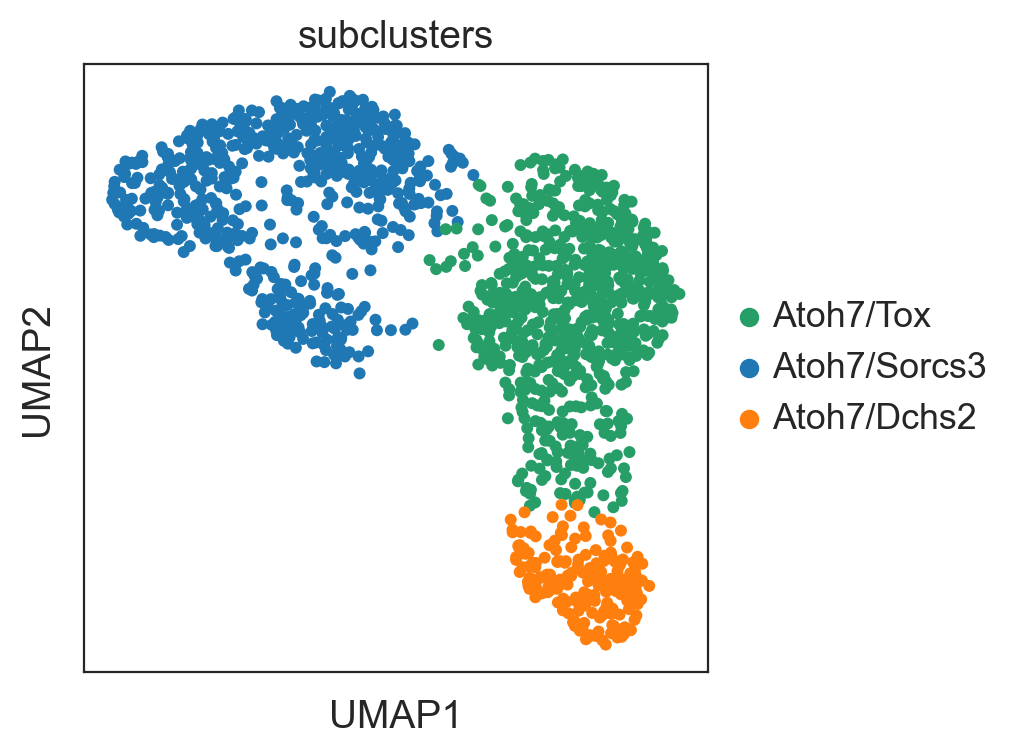

In [7]:
sc.pl.umap(ba, color='subclusters')

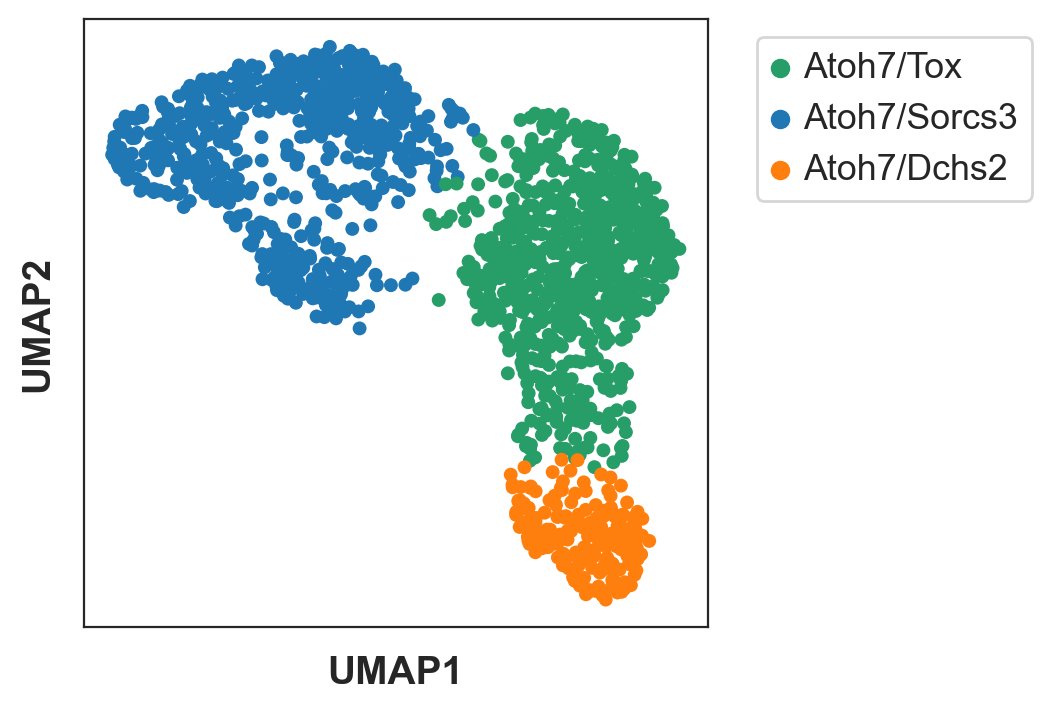

In [8]:
rcParams['figure.figsize'] = 4, 4
sns.scatterplot(ba.obsm['X_umap'][:,0],ba.obsm['X_umap'][:,1],s = 25,
                    hue = ba.obs['subclusters'],
                    edgecolor="none",
                    palette = ['#279e68','#1f77b4','#ff7f0e'],
                    alpha = 1,legend = True)
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1", fontweight ='bold',size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('atoh7_reclustered.pdf',dpi = 300)
plt.savefig('atoh7_reclustered.png',dpi = 300)

In [16]:
pd.DataFrame(pba.obs['mapping_to_reclustered_cluster']).to_csv('E:/atoh7.csv')

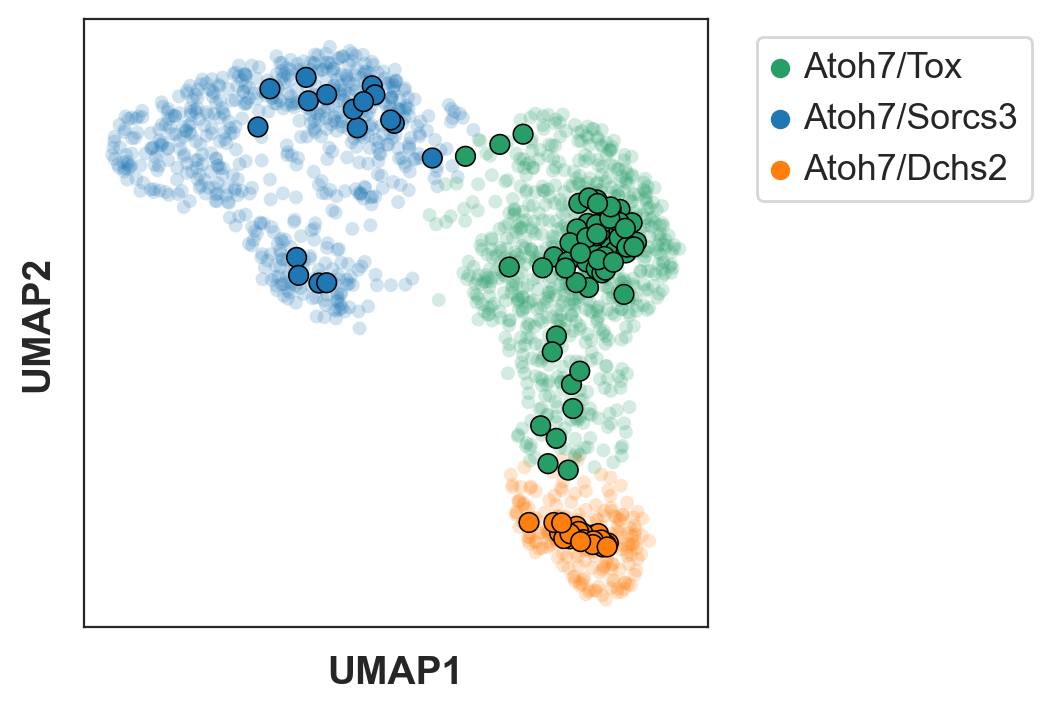

In [17]:
rcParams['figure.figsize'] = 4, 4
sns.scatterplot(ba.obsm['X_umap'][:,0],ba.obsm['X_umap'][:,1],s = 25,
                    hue = ba.obs['subclusters'],
                    edgecolor="none",
                    palette = ['#279e68','#1f77b4','#ff7f0e'],
                    alpha = 0.2,legend = False)

sns.scatterplot(data = pba.obs,s = 50,
                x = 'mapping_to_reclustered_umapX', 
                y = 'mapping_to_reclustered_umapY',
                hue = 'mapping_to_reclustered_cluster',
               edgecolor="black",
                palette = ['#279e68','#1f77b4','#ff7f0e'],
                    alpha = 1,legend = True)
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1", fontweight ='bold',size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('atoh7_mapping.pdf',dpi = 300)
plt.savefig('atoh7_mapping.png',dpi = 300)

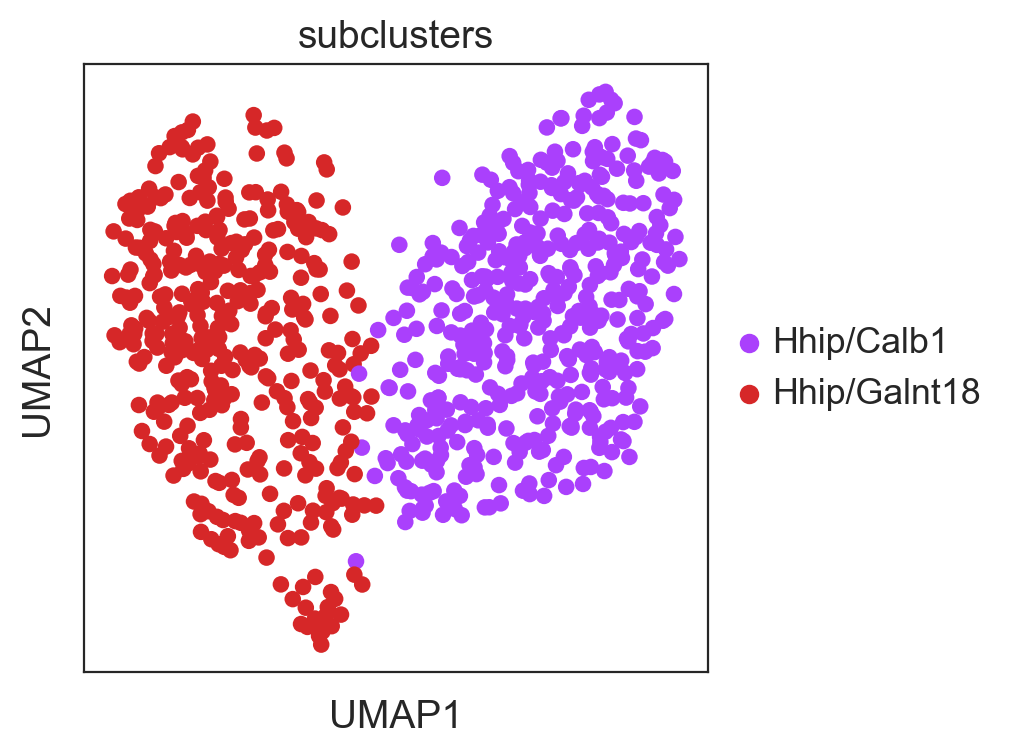

In [18]:
sc.pl.umap(bh, color='subclusters')

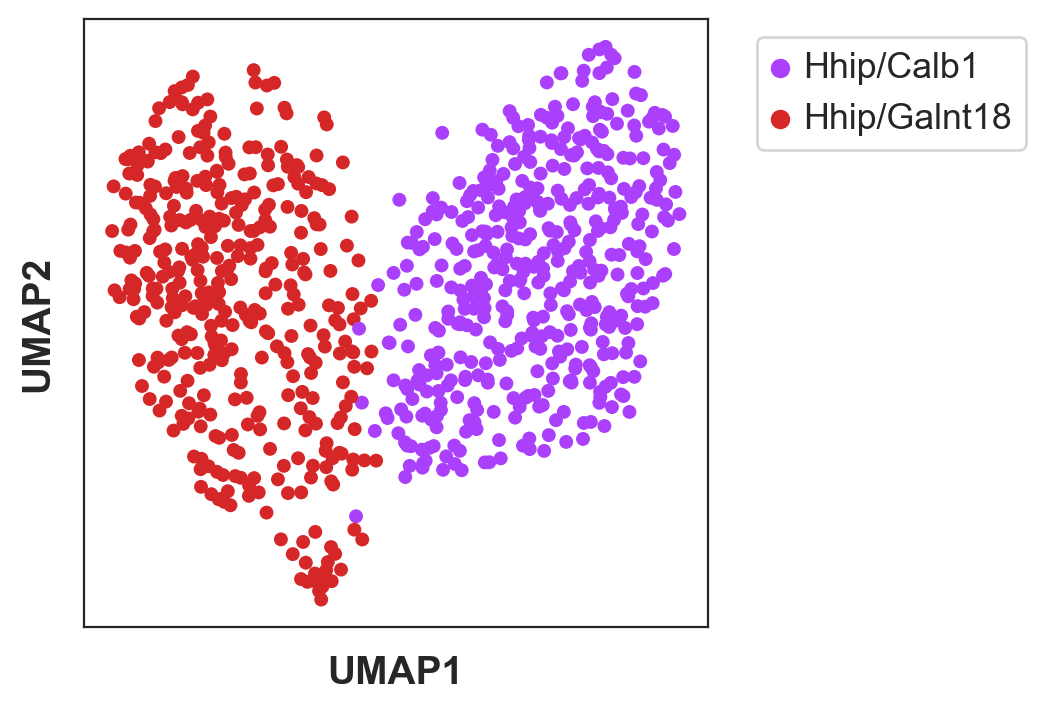

In [19]:
rcParams['figure.figsize'] = 4, 4
sns.scatterplot(bh.obsm['X_umap'][:,0],bh.obsm['X_umap'][:,1],s = 25,
                    hue = bh.obs['subclusters'],palette = ['#aa40fc', '#d62728'],
                    edgecolor="none",
                    alpha = 1,legend = True)
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1", fontweight ='bold',size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('hhip_reclustered.pdf',dpi = 300)
plt.savefig('hhip_reclustered.png',dpi = 300)

In [ ]:
pd.DataFrame(pbh.obs['mapping_to_reclustered_cluster']).to_csv('E:/atoh7.csv')

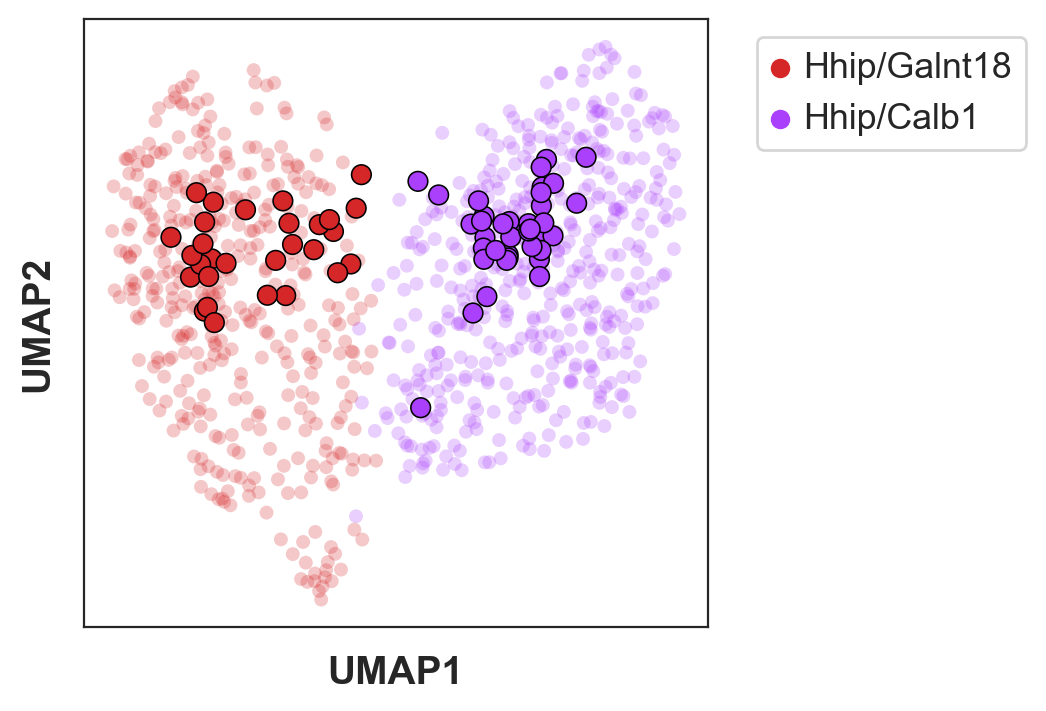

In [17]:
rcParams['figure.figsize'] = 4, 4
sns.scatterplot(bh.obsm['X_umap'][:,0],bh.obsm['X_umap'][:,1],s = 25,
                    hue = bh.obs['subclusters'],palette = ['#aa40fc', '#d62728'],
                    edgecolor="none",
                    alpha = 0.25,legend = False)

sns.scatterplot(data = pbh.obs,s = 50,
                x = 'mapping_to_reclustered_umapX', 
                y = 'mapping_to_reclustered_umapY',
               hue = 'mapping_to_reclustered_cluster',
               edgecolor="black", palette = [ '#d62728','#aa40fc'],
               alpha = 1,legend = True)

plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.xlabel("UMAP1", fontweight ='bold',size=14)
plt.xticks([])
plt.yticks([])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('hhip_mapping.pdf',dpi = 300)
plt.savefig('hhip_mapping.png',dpi = 300)

In [18]:
pbh

AnnData object with n_obs × n_vars = 67 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)'

In [19]:
v = pd.read_csv('VCN.mesh.csv')
d = pd.read_csv('DCN.mesh.csv')
v['2'] = 3897.98 - v['2'] - 200
v['1'] = 4551.38 - v['1'] + 350
v['0'] = v['0'] - 11554.6 - 100
d['2'] = 3897.98 - d['2'] - 200
d['1'] = 4551.38 - d['1'] + 350 
d['0'] = d['0'] - 11554.6 - 100

In [20]:
ba.uns['subclusters_colors'] =  ['#279e68','#1f77b4','#ff7f0e']

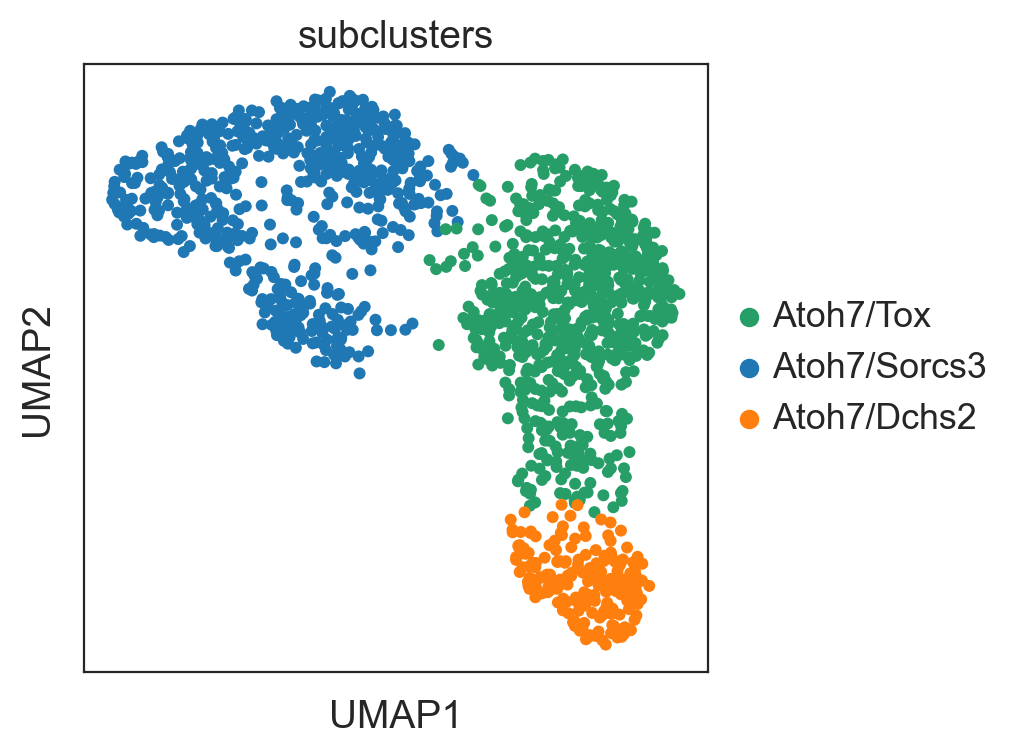

In [21]:
sc.pl.umap(ba, color='subclusters')

In [22]:
adf = pba.obs
adf.loc[adf['mapping_to_reclustered_cluster'] == 'Atoh7/Tox','color'] = '#279e68'
adf.loc[adf['mapping_to_reclustered_cluster'] == 'Atoh7/Sorcs3','color'] = '#1f77b4'
adf.loc[adf['mapping_to_reclustered_cluster'] == 'Atoh7/Dchs2','color'] = '#ff7f0e'

In [23]:
fig = go.Figure(data=[go.Mesh3d(x=v['2'], y=v['1'], z = v['0'],  
                                hovertemplate = None, hoverinfo = "skip",
                                color='lightgray',alphahull=0,
                                opacity=0.3)
                     ])
fig.add_trace(go.Mesh3d(x=d['2'], y=d['1'], z = d['0'], 
                        hovertemplate = None, hoverinfo = "skip",
                        color='gray',alphahull=0, opacity=0.2)
             )

for color in list(set(adf['color'])):
    fig.add_trace(
        go.Scatter3d(
            x = adf[adf['color'] == color]['3d_loc_x'], 
            y = adf[adf['color'] == color]['3d_loc_y'], 
            z = adf[adf['color'] == color]['3d_loc_z'],
            name = list(adf[adf['color'] == color]['mapping_to_reclustered_cluster'])[0],
            mode = 'markers',
            marker=dict(color=adf[adf['color'] == color]['color'],size=4), showlegend=True

    ))


fig.update_layout(legend=dict(
                    yanchor="top",
                    y=0.8,
                    xanchor="left",
                    x=0.7
                  ),
                  
                  scene = dict(
                    xaxis_title='medial to lateral',
                    yaxis_title='posterior to anterior',
                    zaxis_title='dorsal to ventral',
                    xaxis=dict(showticklabels=False),
                    yaxis=dict(showticklabels=False),
                    zaxis=dict(showticklabels=False),
                  ),
                  
                  scene_camera=dict(
                    eye=dict(x=2.5, y=0, z=0.0)
                 ))
fig.show()

fig.write_html("atoh7.html")

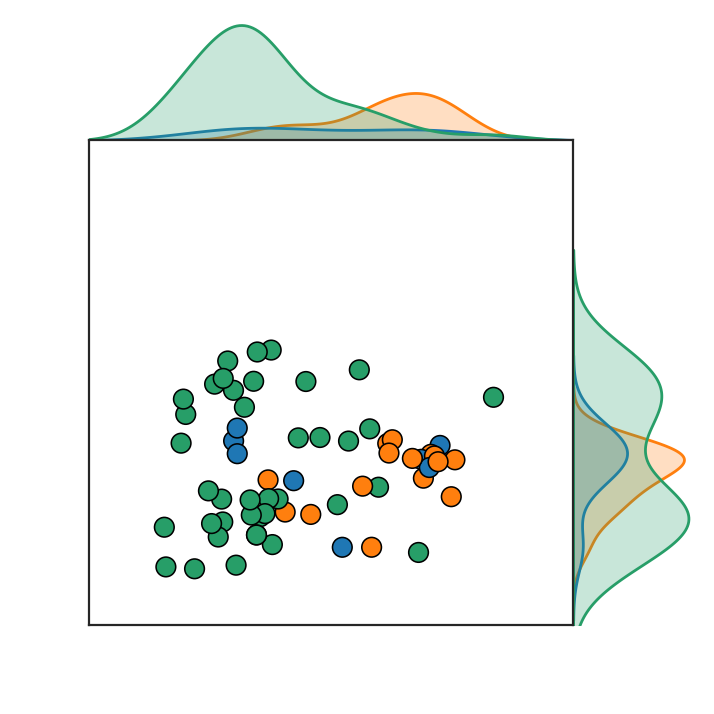

In [24]:
ax = sns.jointplot(data=adf, x=adf['3d_loc_y'], y=adf['3d_loc_z'], s = 50,
                  marginal_ticks= False,legend = False,space=0,edgecolor="black",
                 hue=adf["mapping_to_reclustered_cluster"],
               height = 4, ratio=4, palette = ['#279e68','#1f77b4','#ff7f0e'],
               xlim = [-1600,100],ylim = [-1600,100],
             )
ax.ax_joint.set_xlabel(' ',  fontsize=16)
ax.ax_joint.set_ylabel(' ', fontsize=16)
ax.ax_joint.tick_params(width=0)
ax.ax_joint.set_yticks([])
ax.ax_joint.set_xticks([])
ax.fig.set_figwidth(4.55)
ax.fig.set_figheight(4)
plt.savefig('atoh7_jointplot.pdf',dpi=300)

In [25]:
hdf = pbh.obs
hdf.loc[hdf['mapping_to_reclustered_cluster'] == 'Hhip/Calb1','color'] = '#aa40fc'
hdf.loc[hdf['mapping_to_reclustered_cluster'] == 'Hhip/Galnt18','color'] = '#d62728'

In [26]:
fig = go.Figure(data=[go.Mesh3d(x=v['2'], y=v['1'], z = v['0'],  
                                hovertemplate = None, hoverinfo = "skip",
                                color='lightgray',alphahull=0,
                                opacity=0.3)
                     ])
fig.add_trace(go.Mesh3d(x=d['2'], y=d['1'], z = d['0'], 
                        hovertemplate = None, hoverinfo = "skip",
                        color='gray',alphahull=0, opacity=0.2)
             )
for color in list(set(hdf['color'])):
    fig.add_trace(
        go.Scatter3d(
            x = hdf[hdf['color'] == color]['3d_loc_x'], 
            y = hdf[hdf['color'] == color]['3d_loc_y'], 
            z = hdf[hdf['color'] == color]['3d_loc_z'],
            name = list(hdf[hdf['color'] == color]['mapping_to_reclustered_cluster'])[0],
            mode = 'markers',
            marker=dict(color=hdf[hdf['color'] == color]['color'],size=4), showlegend=True

    ))

fig.update_layout(legend=dict(
                    yanchor="top",
                    y=0.8,
                    xanchor="left",
                    x=0.7
                  ),
                  
                  scene = dict(
                    xaxis_title='medial to lateral',
                    yaxis_title='posterior to anterior',
                    zaxis_title='dorsal to ventral',
                    xaxis=dict(showticklabels=False),
                    yaxis=dict(showticklabels=False),
                    zaxis=dict(showticklabels=False),
                  ),
                  
                  scene_camera=dict(
                    eye=dict(x=2.5, y=2, z=0.0)
                 )
                 )

fig.show()
#fig.write_image("hhip_view_from_posterior.png")
#pio.write_image(fig, "hhip_view_from_posterior.png", width=2.5*300, height=2.5*300, scale=1)
fig.write_html("hhip.html")

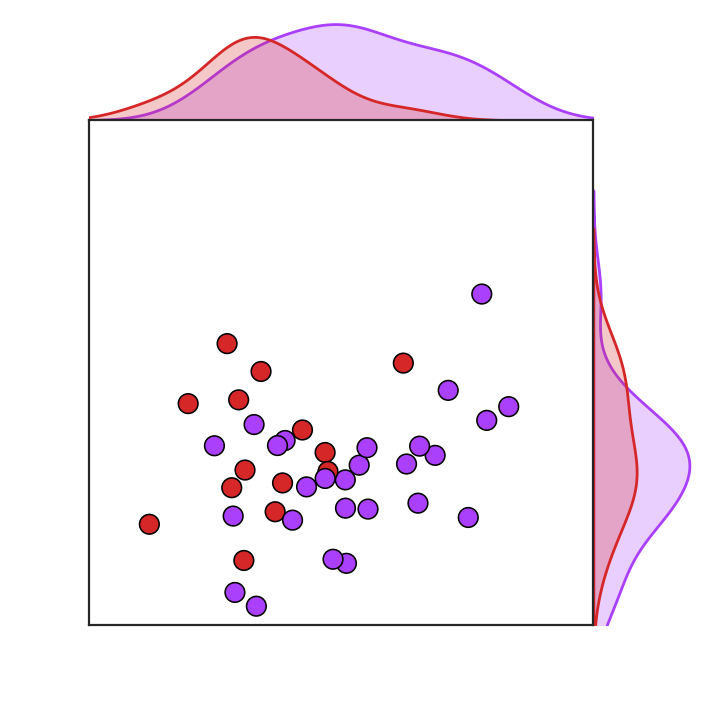

In [27]:
ax = sns.jointplot(data=hdf, x=hdf['3d_loc_y'], y=hdf['3d_loc_z'], s = 50,
               marginal_ticks= False,legend = False,space=0,edgecolor="black",
               hue=hdf["mapping_to_reclustered_cluster"],
               height = 4, ratio=5, 
               palette =[ '#d62728','#aa40fc'],
               xlim = [-1600,100],ylim = [-1600,100],
             )
ax.ax_joint.set_xlabel(' ',  fontsize=16)
ax.ax_joint.set_ylabel(' ', fontsize=16)
ax.ax_joint.tick_params(width=0)
ax.ax_joint.set_yticks([])
ax.ax_joint.set_xticks([])
ax.fig.set_figwidth(4.55)
ax.fig.set_figheight(4)

plt.savefig('hhip_jointplot.pdf',dpi=300)

In [24]:
efeatures = ['mapping_to_reclustered_cluster','Tau (ms)', 
             'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 
             'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 
             'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 
             'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 
             'AP Number @ 2xRheabase', 'Rebound_abs (mV)', 
             'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 
             'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)', 'epsc_amp (pA)', 
             'ipsc_rise_time (ms)', 'ipsc_half_width (ms)', 'ipsc_decay_tau (ms)', 'ipsc_freq (Hz)', 'ipsc_amp (pA)', ]
mfeatures = ['mapping_to_reclustered_cluster','branch_points', 'width', 'depth', 'width_depth_ratio', 'squareness', 
               'height','tips', 'stems', 'total_length', 'avg_thickness', 
               'max_thickness', 'total_surface', 'total_volume', 'max_path_dist_to_soma',
               'max_branch_order', 'max_path_angle', 'min_path_angle', 'median_path_angle', 'mean_soma_exit_angle',
               'max_segment_path_length', 'median_intermediate_segment_pl', 'median_terminal_segment_pl', 'log_max_tortuosity',
               'log_min_tortuosity', 'log_median_tortuosity', 'max_branch_angle', 'min_branch_angle', 'mean_branch_angle',
               'max_degree', 'tree_asymmetry', 'stem_max', 'stem_mean', 'stem_min', 'dist_to_dorsal',
               'soma_perimeter', 'soma_area', 'soma_feret_max', 'soma_feret_min', 'soma_aspect_ratio',
               'soma_compactness', 'soma_convexity', 'soma_form_factor', 'soma_roundness', 'soma_solidity']

In [29]:
df = pba.obs[efeatures]
df_count = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].count()
df_mean = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].std()
df_ste = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].std()/(df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].count())**0.5
df_ste = df_ste.round(3)
test = pd.DataFrame(columns = ['Atoh7/Tox','Atoh7/Sorcs3','Atoh7/Dchs2',
                               'Tox vs Sorcs3_p-values','Tox vs Sorcs3_significance',
                               'Tox vs Dchs2_p-values','Tox vs Dchs2_significance',
                               'Sorcs3 vs Dchs2_p-values','Sorcs3 vs Dchs2_significance',
                              ])
test['Atoh7/Tox'] = df_mean.T['Atoh7/Tox'].map(str) + " ± " + df_ste.T['Atoh7/Tox'].map(str)
test['Atoh7/Sorcs3'] = df_mean.T['Atoh7/Sorcs3'].map(str) + " ± " + df_ste.T['Atoh7/Sorcs3'].map(str)
test['Atoh7/Dchs2'] = df_mean.T['Atoh7/Dchs2'].map(str) + " ± " + df_ste.T['Atoh7/Dchs2'].map(str)

In [30]:
for name in efeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Tox'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Sorcs3'])][name].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    
    test.loc[name]['Tox vs Sorcs3_p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['Tox vs Sorcs3_significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['Tox vs Sorcs3_significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['Tox vs Sorcs3_significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['Tox vs Sorcs3_significance'] = '*'
                    
for name in efeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Tox'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Dchs2'])][name].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    test.loc[name]['Tox vs Dchs2_p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['Tox vs Dchs2_significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['Tox vs Dchs2_significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['Tox vs Dchs2_significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['Tox vs Dchs2_significance'] = '*'
                    
for name in efeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Sorcs3'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Dchs2'])][name].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    test.loc[name]['Sorcs3 vs Dchs2_p-values'] = format(p,'.4f')
    
    if p >= 0.05:
        test.loc[name]['Sorcs3 vs Dchs2_significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['Sorcs3 vs Dchs2_significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['Sorcs3 vs Dchs2_significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['Sorcs3 vs Dchs2_significance'] = '*'

In [31]:
test

Atoh7/Tox     Atoh7/Sorcs3       Atoh7/Dchs2  \
Tau (ms)                     2.474 ± 0.202    1.577 ± 0.122    12.293 ± 1.681   
SagRatio                     1.813 ± 0.048    1.976 ± 0.101     1.323 ± 0.036   
Rebound (mV)                 8.817 ± 0.419    8.603 ± 0.951     7.004 ± 0.886   
RM (Mohm)                   64.957 ± 4.004   41.662 ± 3.182  151.049 ± 11.882   
RMP (mV)                   -47.897 ± 0.995    -51.9 ± 1.208   -39.561 ± 2.272   
RheoBase (pA)             284.385 ± 17.285   389.412 ± 39.4  176.786 ± 19.778   
Spike Delay (ms)             3.171 ± 0.205    2.423 ± 0.259    11.203 ± 2.683   
Threshold (mV)             -35.197 ± 0.812   -32.654 ± 1.43   -39.502 ± 0.976   
Amplitude (mV)                24.29 ± 1.03   28.217 ± 4.119    32.593 ± 1.672   
AHP (mV)                   -11.164 ± 0.683  -13.412 ± 1.772   -10.741 ± 1.131   
Depolarization Time (ms)     0.486 ± 0.028    0.539 ± 0.064        0.4 ± 0.02   
Repolarization Time (ms)      0.911 ± 0.05    1.048 ± 0.162     0.602 ± 0.061   
Half Width (ms)               0.707 ± 0.04    0.749 ± 0.081     0.496 ± 0.037   
Max Spike Number             4.462 ± 0.888    6.235 ± 3.202    23.929 ± 7.092   
AP Number @ 2xRheabase       2.446 ± 0.451    6.059 ± 3.217    15.286 ± 5.375   
Rebound_abs (mV)            16.025 ± 1.648   15.327 ± 3.095    11.432 ± 2.406   
Rebound_spikes               0.231 ± 0.053    0.176 ± 0.095     0.107 ± 0.079   
Spike_Delay @ 2xRheobase     1.137 ± 0.072    0.894 ± 0.078     2.899 ± 0.395   
epsc_rise_time (ms)          0.645 ± 0.074    0.413 ± 0.022      0.61 ± 0.097   
epsc_half_width (ms)         0.708 ± 0.027    0.737 ± 0.044     0.809 ± 0.048   
epsc_decay_tau (ms)          0.616 ± 0.044    0.519 ± 0.028     0.731 ± 0.071   
epsc_freq (Hz)              16.692 ± 3.741   23.696 ± 6.952     14.27 ± 3.051   
epsc_amp (pA)               43.617 ± 2.422   28.521 ± 2.338    35.086 ± 2.622   
ipsc_rise_time (ms)          2.171 ± 0.108    2.665 ± 0.303     1.882 ± 0.141   
ipsc_half_width (ms)         3.847 ± 0.131     4.311 ± 0.38     2.824 ± 0.094   
ipsc_decay_tau (ms)          3.593 ± 0.142    4.115 ± 0.497     2.043 ± 0.146   
ipsc_freq (Hz)               8.112 ± 0.961    3.885 ± 1.533      7.84 ± 2.501   
ipsc_amp (pA)                17.736 ± 0.94   12.239 ± 1.311    13.697 ± 1.447   

                         Tox vs Sorcs3_p-values Tox vs Sorcs3_significance  \
Tau (ms)                                 0.0283                          *   
SagRatio                                 0.1324                              
Rebound (mV)                             0.8226                              
RM (Mohm)                                0.0048                         **   
RMP (mV)                                 0.0539                              
RheoBase (pA)                            0.0091                         **   
Spike Delay (ms)                         0.0817                              
Threshold (mV)                           0.1498                              
Amplitude (mV)                           0.1787                              
AHP (mV)                                 0.1667                              
Depolarization Time (ms)                 0.4128                              
Repolarization Time (ms)                 0.2852                              
Half Width (ms)                          0.6320                              
Max Spike Number                         0.4568                              
AP Number @ 2xRheabase                   0.0534                              
Rebound_abs (mV)                         0.8464                              
Rebound_spikes                           0.6351                              
Spike_Delay @ 2xRheobase                 0.1044                              
epsc_rise_time (ms)                      0.1137                              
epsc_half_width (ms)                     0.6111                              
epsc_decay_tau (ms)                      0.26

In [32]:
df = pba.obs[mfeatures]
df_count = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].count()
df_mean = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].std()
df_ste = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].std()/(df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].count())**0.5
df_ste = df_ste.round(3)
test = pd.DataFrame(columns = ['Atoh7/Tox','Atoh7/Sorcs3','Atoh7/Dchs2',
                               'Tox vs Sorcs3_p-values','Tox vs Sorcs3_significance',
                               'Tox vs Dchs2_p-values','Tox vs Dchs2_significance',
                               'Sorcs3 vs Dchs2_p-values','Sorcs3 vs Dchs2_significance',
                              ])
test['Atoh7/Tox'] = df_mean.T['Atoh7/Tox'].map(str) + " ± " + df_ste.T['Atoh7/Tox'].map(str)
test['Atoh7/Sorcs3'] = df_mean.T['Atoh7/Sorcs3'].map(str) + " ± " + df_ste.T['Atoh7/Sorcs3'].map(str)
test['Atoh7/Dchs2'] = df_mean.T['Atoh7/Dchs2'].map(str) + " ± " + df_ste.T['Atoh7/Dchs2'].map(str)

In [33]:
for name in mfeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Tox'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Sorcs3'])][name].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)

    test.loc[name]['Tox vs Sorcs3_p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['Tox vs Sorcs3_significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['Tox vs Sorcs3_significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['Tox vs Sorcs3_significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['Tox vs Sorcs3_significance'] = '*'
                    
for name in mfeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Tox'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Dchs2'])][name].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    test.loc[name]['Tox vs Dchs2_p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['Tox vs Dchs2_significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['Tox vs Dchs2_significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['Tox vs Dchs2_significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['Tox vs Dchs2_significance'] = '*'
                    
for name in mfeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Sorcs3'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Atoh7/Dchs2'])][name].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    print(name,len(a),len(b))
    test.loc[name]['Sorcs3 vs Dchs2_p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['Sorcs3 vs Dchs2_significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['Sorcs3 vs Dchs2_significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['Sorcs3 vs Dchs2_significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['Sorcs3 vs Dchs2_significance'] = '*'

branch_points 6 13
width 6 13
depth 6 13
width_depth_ratio 6 13
squareness 6 13
height 6 13
tips 6 13
stems 6 13
total_length 6 13
avg_thickness 6 13
max_thickness 6 13
total_surface 6 13
total_volume 6 13
max_path_dist_to_soma 6 13
max_branch_order 6 13
max_path_angle 6 13
min_path_angle 6 13
median_path_angle 6 13
mean_soma_exit_angle 6 13
max_segment_path_length 6 13
median_intermediate_segment_pl 6 13
median_terminal_segment_pl 6 13
log_max_tortuosity 6 13
log_min_tortuosity 6 13
log_median_tortuosity 6 13
max_branch_angle 6 13
min_branch_angle 6 13
mean_branch_angle 6 13
max_degree 6 13
tree_asymmetry 6 13
stem_max 6 13
stem_mean 6 13
stem_min 6 13
dist_to_dorsal 6 13
soma_perimeter 6 13
soma_area 6 13
soma_feret_max 6 13
soma_feret_min 6 13
soma_aspect_ratio 6 13
soma_compactness 6 13
soma_convexity 6 13
soma_form_factor 6 13
soma_roundness 6 13
soma_solidity 6 13


In [34]:
test

Atoh7/Tox         Atoh7/Sorcs3  \
branch_points                       20.462 ± 1.796       13.667 ± 2.124   
width                                99.769 ± 7.44     146.568 ± 19.421   
depth                               83.978 ± 5.719     100.528 ± 16.783   
width_depth_ratio                    1.236 ± 0.079        1.613 ± 0.236   
squareness                           1.416 ± 0.074        1.818 ± 0.105   
height                              49.173 ± 6.501       53.15 ± 11.552   
tips                                23.462 ± 1.961       16.167 ± 2.151   
stems                                1.731 ± 0.212        2.167 ± 0.307   
total_length                      788.705 ± 63.056     712.408 ± 82.225   
avg_thickness                        0.869 ± 0.037        1.063 ± 0.097   
max_thickness                       11.439 ± 0.378         9.97 ± 0.781   
total_surface                   4595.822 ± 318.966    5315.59 ± 844.753   
total_volume                    4856.999 ± 534.017  5453.613 ± 1048.484   
max_path_dist_to_soma               195.587 ± 9.28     224.288 ± 30.021   
max_branch_order                    10.308 ± 0.679          7.5 ± 0.764   
max_path_angle                     101.204 ± 3.575        89.399 ± 3.22   
min_path_angle                           0.0 ± 0.0            0.0 ± 0.0   
median_path_angle                    4.492 ± 0.562        2.314 ± 0.673   
mean_soma_exit_angle                41.437 ± 9.402      81.125 ± 17.922   
max_segment_path_length             76.609 ± 5.255     131.982 ± 14.881   
median_intermediate_segment_pl      11.019 ± 1.016       10.913 ± 1.669   
median_terminal_segment_pl           17.865 ± 1.48        17.37 ± 2.534   
log_max_tortuosity                   1.097 ± 0.071        1.003 ± 0.125   
log_min_tortuosity                   0.002 ± 0.001            0.0 ± 0.0   
log_median_tortuosity                0.181 ± 0.013        0.193 ± 0.021   
max_branch_angle                   154.486 ± 2.791      142.751 ± 6.934   
min_branch_angle                     17.71 ± 3.701        29.58 ± 4.651   
mean_branch_angle                   83.439 ± 1.963       88.166 ± 3.264   
max_degree                           2.731 ± 0.105        2.667 ± 0.211   
tree_asymmetry                       0.798 ± 0.027        0.807 ± 0.037   
stem_max                            44.147 ± 6.627      93.715 ± 20.806   
stem_mean                           35.857 ± 4.564      64.938 ± 14.911   
stem_min                            28.077 ± 4.286      31.889 ± 11.853   
dist_to_dorsal                     1479.742 ± 56.9   1275.278 ± 133.353   
soma_perimeter                      62.684 ± 1.764       55.292 ± 4.379   
soma_area                         261.893 ± 13.615     219.212 ± 39.754   
soma_feret_max                      22.466 ± 0.654       19.317 ± 1.755   
soma_feret_min                      15.092 ± 0.598       14.063 ± 1.359   
soma_aspect_ratio                     1.54 ± 0.068        1.383 ± 0.069   
soma_compactness                     0.812 ± 0.017         0.85 ± 0.023   
soma_convexity                       0.963 ± 0.009         0.967 ± 0.02   
soma_form_factor                     0.829 ± 0.016        0.865 ± 0.034   
soma_roundness                       0.665 ± 0.027        0.728 ± 0.037   
soma_solidity                        0.998 ± 0.001        0.998 ± 0.002   

                                       Atoh7/Dchs2 Tox vs Sorcs3_p-values  \
branch_points                         22.0 ± 3.262                 0.0922   
width                             145.405 ± 12.241                 0.0142   
depth                             130.642 ± 15.703                 0.2547   
width_depth_ratio                     1.33 ± 0.209                 0.0666   
squareness                           1.588 ± 0.163                 0.0196   
height                              58.781 ± 9.992                 0.7882   
tips                                  24.0 ± 3.614                 0.0961   
stems                                1.538 ± 0.18

In [35]:
df = pbh.obs[efeatures]
df_count = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].count()
df_mean = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].std()
df_ste = df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].std()/(df.groupby('mapping_to_reclustered_cluster')[efeatures[1:]].count())**0.5
df_ste = df_ste.round(3)
test = pd.DataFrame(columns = ['Hhip/Calb1','Hhip/Galnt18',
                               'p-values','significance',
                              ])
test['Hhip/Calb1'] = df_mean.T['Hhip/Calb1'].map(str) + " ± " + df_ste.T['Hhip/Calb1'].map(str)
test['Hhip/Galnt18'] = df_mean.T['Hhip/Galnt18'].map(str) + " ± " + df_ste.T['Hhip/Galnt18'].map(str)

In [36]:
for name in efeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Hhip/Calb1'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Hhip/Galnt18'])][name].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    test.loc[name]['p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['significance'] = '*'

In [37]:
test

Hhip/Calb1      Hhip/Galnt18 p-values  \
Tau (ms)                     3.274 ± 0.591     3.031 ± 0.423   0.7541   
SagRatio                     2.027 ± 0.069     2.141 ± 0.059   0.2295   
Rebound (mV)                 8.975 ± 1.283      9.825 ± 0.55   0.5845   
RM (Mohm)                   53.999 ± 2.656    60.779 ± 7.241   0.3369   
RMP (mV)                   -49.076 ± 0.823   -52.708 ± 1.179   0.0114   
RheoBase (pA)             393.421 ± 24.972  273.966 ± 20.985   0.0008   
Spike Delay (ms)             1.732 ± 0.104     3.219 ± 0.465   0.0008   
Threshold (mV)              -33.83 ± 1.062    -35.32 ± 1.121   0.3434   
Amplitude (mV)              27.133 ± 1.679     41.293 ± 2.56   0.0000   
AHP (mV)                    -9.515 ± 0.646   -18.374 ± 1.094   0.0000   
Depolarization Time (ms)     0.415 ± 0.018     0.327 ± 0.012   0.0004   
Repolarization Time (ms)     0.509 ± 0.033     0.285 ± 0.018   0.0000   
Half Width (ms)              0.446 ± 0.024     0.307 ± 0.013   0.0000   
Max Spike Number             1.263 ± 0.238     9.828 ± 4.705   0.0411   
AP Number @ 2xRheabase           1.0 ± 0.0     8.276 ± 3.976   0.0396   
Rebound_abs (mV)            18.841 ± 2.931    24.568 ± 4.455   0.2688   
Rebound_spikes               0.289 ± 0.075      0.31 ± 0.101   0.8652   
Spike_Delay @ 2xRheobase     0.687 ± 0.048     1.037 ± 0.109   0.0021   
epsc_rise_time (ms)           0.989 ± 0.15     0.616 ± 0.091   0.0469   
epsc_half_width (ms)         0.976 ± 0.083     0.773 ± 0.044   0.0450   
epsc_decay_tau (ms)          0.777 ± 0.076     0.703 ± 0.061   0.4567   
epsc_freq (Hz)               9.584 ± 3.214    11.317 ± 2.647   0.6858   
epsc_amp (pA)               35.796 ± 2.928    39.719 ± 2.865   0.3466   
ipsc_rise_time (ms)          1.695 ± 0.071     1.893 ± 0.086   0.0784   
ipsc_half_width (ms)         3.143 ± 0.094     3.596 ± 0.143   0.0085   
ipsc_decay_tau (ms)          2.782 ± 0.171      3.33 ± 0.194   0.0381   
ipsc_freq (Hz)              13.327 ± 2.441     9.682 ± 2.116   0.2761   
ipsc_amp (pA)               20.229 ± 1.382    17.072 ± 1.325   0.1101   

                         significance  
Tau (ms)                               
SagRatio                               
Rebound (mV)                           
RM (Mohm)                              
RMP (mV)                            *  
RheoBase (pA)                     ***  
Spike Delay (ms)                  ***  
Threshold (mV)                         
Amplitude (mV)                    ***  
AHP (mV)                          ***  
Depolarization Time (ms)          ***  
Repolarization Time (ms)          ***  
Half Width (ms)                   ***  
Max Spike Number                    *  
AP Number @ 2xRheabase              *  
Rebound_abs (mV)                       
Rebound_spikes                         
Spike_Delay @ 2xRheobase           **  
epsc_rise_time (ms)                 *  
epsc_half_width (ms)                *  
epsc_decay_tau (ms)                    
epsc_freq (Hz)                         
epsc_amp (pA)                          
ipsc_rise_time (ms)                    
ipsc_half_width (ms)               **  
ipsc_decay_tau (ms)                 *  
ipsc_freq (Hz)                         
ipsc_amp (pA)

In [38]:
df = pbh.obs[mfeatures]
df_count = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].count()
df_mean = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].std()
df_ste = df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].std()/(df.groupby('mapping_to_reclustered_cluster')[mfeatures[1:]].count())**0.5
df_ste = df_ste.round(3)
test = pd.DataFrame(columns = ['Hhip/Calb1','Hhip/Galnt18',
                               'p-values','significance',
                              ])
test['Hhip/Calb1'] = df_mean.T['Hhip/Calb1'].map(str) + " ± " + df_ste.T['Hhip/Calb1'].map(str)
test['Hhip/Galnt18'] = df_mean.T['Hhip/Galnt18'].map(str) + " ± " + df_ste.T['Hhip/Galnt18'].map(str)
for name in mfeatures[1:]:
    a = df[df['mapping_to_reclustered_cluster'].isin(['Hhip/Calb1'])][name].dropna()
    b = df[df['mapping_to_reclustered_cluster'].isin(['Hhip/Galnt18'])][name].dropna()
    print(name,len(a),len(b))
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    test.loc[name]['p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['significance'] = '*'

branch_points 11 8
width 11 8
depth 11 8
width_depth_ratio 11 8
squareness 11 8
height 11 8
tips 11 8
stems 11 8
total_length 11 8
avg_thickness 11 8
max_thickness 11 8
total_surface 11 8
total_volume 11 8
max_path_dist_to_soma 11 8
max_branch_order 11 8
max_path_angle 11 8
min_path_angle 11 8
median_path_angle 11 8
mean_soma_exit_angle 11 8
max_segment_path_length 11 8
median_intermediate_segment_pl 11 8
median_terminal_segment_pl 11 8
log_max_tortuosity 11 8
log_min_tortuosity 11 8
log_median_tortuosity 11 8
max_branch_angle 11 8
min_branch_angle 11 8
mean_branch_angle 11 8
max_degree 11 8
tree_asymmetry 11 8
stem_max 11 8
stem_mean 11 8
stem_min 11 8
dist_to_dorsal 11 8
soma_perimeter 11 8
soma_area 11 8
soma_feret_max 11 8
soma_feret_min 11 8
soma_aspect_ratio 11 8
soma_compactness 11 8
soma_convexity 11 8
soma_form_factor 11 8
soma_roundness 11 8
soma_solidity 11 8


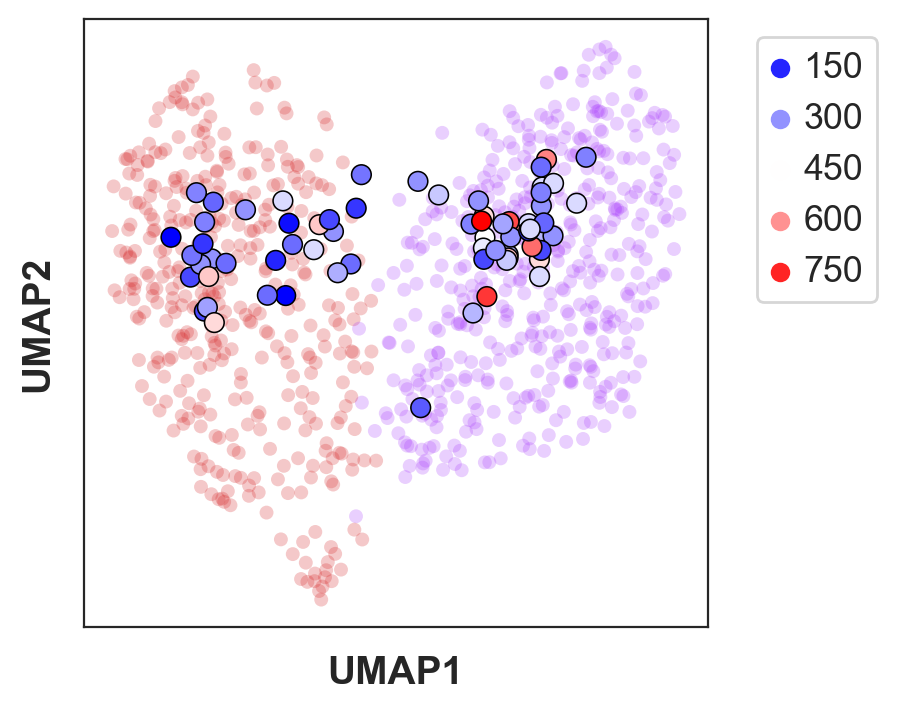

In [39]:
rcParams['figure.figsize'] = 4, 4
sns.scatterplot(bh.obsm['X_umap'][:,0],bh.obsm['X_umap'][:,1],s = 25,
                    hue = bh.obs['subclusters'],palette = ['#aa40fc', '#d62728'],
                    edgecolor="none",
                    alpha = 0.25,legend = False)

sns.scatterplot(data = pbh.obs,s = 50,
                x = 'mapping_to_reclustered_umapX', 
                y = 'mapping_to_reclustered_umapY',
               hue = 'RheoBase (pA)',
               edgecolor="black", palette = 'bwr',
               alpha = 1,legend = True)

plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.xlabel("UMAP1", fontweight ='bold',size=14)
plt.xticks([])
plt.yticks([])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.savefig('hhip_mapping.pdf',dpi = 300)
# plt.savefig('hhip_mapping.png',dpi = 300)

In [40]:
adata = pba.obs[[
 'Tau (ms)',
 'SagRatio',
 'Rebound (mV)',
 'RM (Mohm)',
 'RMP (mV)',
 'RheoBase (pA)',
 'Spike Delay (ms)',
 'Threshold (mV)',
 'Amplitude (mV)',
 'AHP (mV)',
 'Depolarization Time (ms)',
 'Repolarization Time (ms)',
 'Half Width (ms)',
 'Max Spike Number',
        ]]
scaled_features = StandardScaler().fit_transform(adata.values)

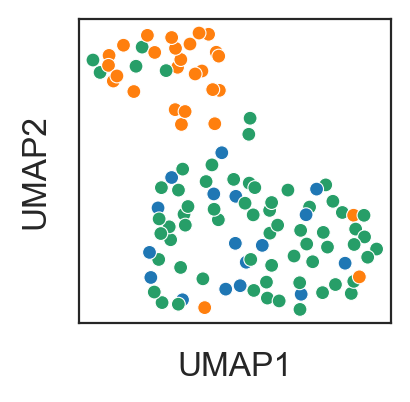

In [41]:
embedding = umap.UMAP(random_state = 0, min_dist = 0.3, n_components = 2, n_neighbors = 10).fit_transform(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = pba.obs['mapping_to_reclustered_cluster'],
               palette = ['#279e68','#1f77b4','#ff7f0e'],
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
plt.savefig('atoh7_subcluster.png',dpi = 300)

In [17]:
kmeans_labels = cluster.KMeans(n_clusters=2,random_state=0).fit_predict(scaled_features)

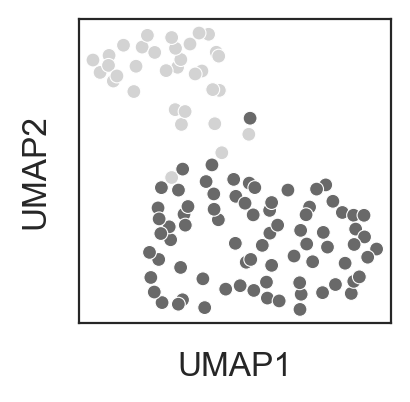

In [18]:
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = kmeans_labels,
               palette = ['dimgray','lightgray'],
               s=25,legend = False);

plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
plt.savefig('atoh7_subcluster_kmeans.png',dpi = 300)

In [21]:
df = pd.DataFrame()
df['T_clusters'] =   list(pba.obs['mapping_to_reclustered_cluster'])
df['pred'] = kmeans_labels
df.loc[df['pred'] == 0, 'pred_label'] = 'cluster0'
df.loc[df['pred'] == 1, 'pred_label'] = 'cluster1'
matchPairs = df.groupby(['T_clusters','pred']).count()
pCts  = ['Atoh7/Sorcs3','Atoh7/Tox','Atoh7/Dchs2']
kCts = [0,1]
mapping = pd.DataFrame(index = pCts, columns = kCts)
mapping= mapping.fillna(0.0)
for names in pCts:
    count = matchPairs.loc[names].sum()
    name = list(matchPairs.loc[names].index)
    for n in name:
        mapping.loc[names][n] = matchPairs.loc[names,n]#/count

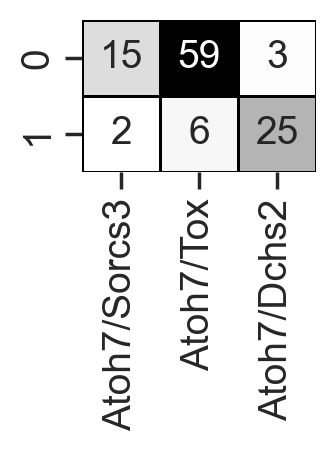

In [22]:
rcParams['figure.figsize'] = 1.5, 1.0
ax = sns.heatmap(mapping.T, cmap='Greys',cbar=False,
                 linewidths=1, linecolor='black',annot = True, 
                )
plt.savefig('atoh7_subcluster_kmeans_cm.pdf',dpi = 300)

In [42]:
paras = ['Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)',
'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)','Threshold (mV)', 
'Amplitude (mV)', 'AHP (mV)','Depolarization Time (ms)', 'Repolarization Time (ms)', 
'Half Width (ms)','Max Spike Number', 
#'AP Number @ 2xRheabase',  'Spike_Delay @ 2xRheobase'
        ]

In [25]:
from itertools import combinations

In [44]:
from itertools import combinations
import sklearn.cluster as cluster
j = 0
for l in list(combinations(paras,10)):
    j = j + 1
    l = list(l)
    adata = pbh.obs[l]
    scaled_features = StandardScaler().fit_transform(adata.values)
    #embedding = umap.UMAP(random_state = 0, min_dist = 0.6, n_components = 2, n_neighbors = 10).fit_transform(scaled_features)
    kmeans_labels = cluster.KMeans(n_clusters=2,random_state=0).fit_predict(scaled_features)
    pred_labs = kmeans_labels.astype('object')
    x_true = pbh.obs['mapping_to_reclustered_cluster']
    df = pd.DataFrame()
    df['mapping_to_reclustered_cluster'] =  x_true
    df['pred'] = kmeans_labels
    for i in range(0,kmeans_labels.max()+1,1):
        pred_labs[pred_labs == i] = df[df['pred'] == i].groupby(by = ['mapping_to_reclustered_cluster']).count()['pred'].idxmax()

    y_pred = pred_labs
    cm = confusion_matrix(x_true, y_pred)
    true_n = 0
    total_n = 0
    for i in range(0,2,1):
        true_n = true_n + cm[i,i]
        total_n = total_n + sum(cm[:,i])   
    acur_rate = true_n/total_n*100.0
    if acur_rate > 92:
        print(l,acur_rate)
    if j%1000 == 0:
        print(j)
print(' done')

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


['Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'AHP (mV)', 'Half Width (ms)', 'Max Spike Number'] 92.53731343283582
['Tau (ms)', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Amplitude (mV)', 'AHP (mV)', 'Half Width (ms)', 'Max Spike Number'] 94.02985074626866


KeyboardInterrupt: 

In [45]:
adata = pbh.obs[[
'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 
    'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Repolarization Time (ms)', 'Max Spike Number'
        ]]
scaled_features = StandardScaler().fit_transform(adata.values)

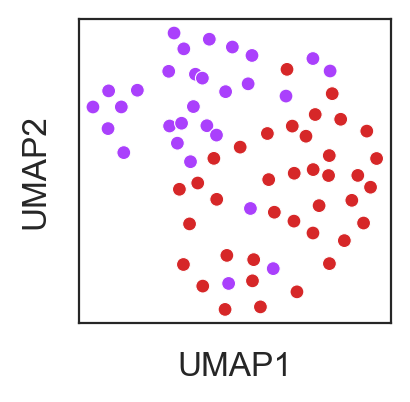

In [46]:
embedding = umap.UMAP(random_state = 0, min_dist = 0.4, n_components = 2, n_neighbors = 10).fit_transform(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = pbh.obs['mapping_to_reclustered_cluster'],
               palette = ['#aa40fc', '#d62728'],
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
plt.savefig('hhip_subcluster.png',dpi = 300)

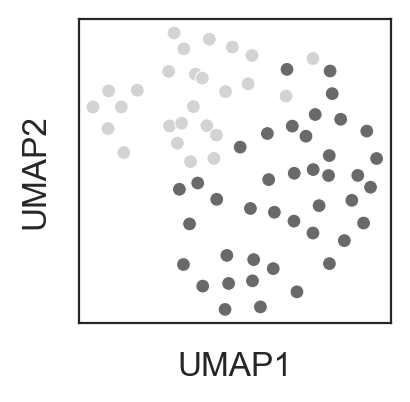

In [47]:
kmeans_labels = cluster.KMeans(n_clusters=2,random_state=0).fit_predict(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = kmeans_labels,
               palette = ['dimgray','lightgray'],
               s=25,legend = False);

plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
plt.savefig('hhip_subcluster_kmeans.png',dpi = 300)

In [48]:
df = pd.DataFrame()
df['T_clusters'] =   list(pbh.obs['mapping_to_reclustered_cluster'])
df['pred'] = kmeans_labels
df.loc[df['pred'] == 0, 'pred_label'] = 'cluster0'
df.loc[df['pred'] == 1, 'pred_label'] = 'cluster1'
matchPairs = df.groupby(['T_clusters','pred']).count()
pCts  = ['Hhip/Calb1','Hhip/Galnt18']
kCts = [0,1]
mapping = pd.DataFrame(index = pCts, columns = kCts)
mapping= mapping.fillna(0.0)
for names in pCts:
    count = matchPairs.loc[names].sum()
    name = list(matchPairs.loc[names].index)
    for n in name:
        mapping.loc[names][n] = matchPairs.loc[names,n]#/count

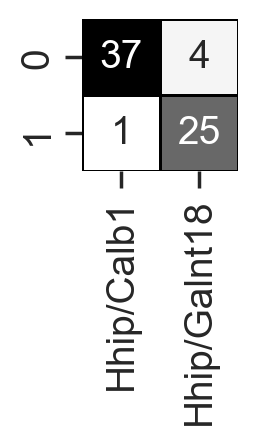

In [49]:
rcParams['figure.figsize'] = 1.0, 1.0
ax = sns.heatmap(mapping.T, cmap='Greys',cbar=False,
                 linewidths=1, linecolor='black',annot = True, 
                )
plt.savefig('hhip_subcluster_kmeans_cm.pdf',dpi = 300)

In [50]:
marker = pd.DataFrame(ba.uns['rank_genes_groups']['names']).head(200)
genes_list = list(marker['Atoh7/Tox'])[0:5]
genes_list.extend(list(marker['Atoh7/Sorcs3'])[0:5])
genes_list.extend(list(marker['Atoh7/Dchs2'])[0:5])
df =  sc.get.obs_df(ba, genes_list)
df[df<0]=0
df = df/df.max()
df['subclusters'] = ba.obs['subclusters']

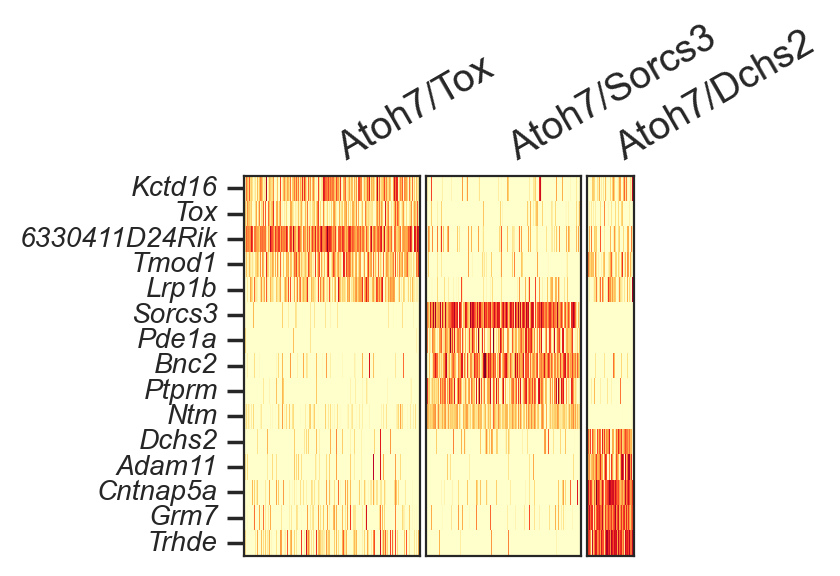

In [51]:
rcParams['figure.figsize'] = 2.5, 2.5
fig, axes= plt.subplots(1,3, gridspec_kw={'width_ratios':[752,661,200]})
types = ['Atoh7/Tox', 'Atoh7/Sorcs3', 'Atoh7/Dchs2']
cluster = types
vmax = None
vmin = 0
g = sns.heatmap(df[df['subclusters'].isin([cluster[0]])].iloc[:, 0:-1].T,
                yticklabels=1,vmax = vmax,vmin = vmin,
                cmap="YlOrRd",cbar=False,ax=axes[0])
g.set_xlabel('')
g.set_title(types[0],
            rotation=30, horizontalalignment='left'
           )
g.tick_params(bottom=False)
i = 1
for lab in g.get_yticklabels():
    lab.set_style("italic")
    lab.set_fontsize(10)
for clust in cluster[1:3]:
    g = sns.heatmap(df[df['subclusters'].isin([cluster[i]])].iloc[:, 0:-1].T,
                    cmap="YlOrRd",vmax = vmax,vmin = vmin,
                    cbar=False,ax=axes[i])
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_yticks([])
    g.set_title(clust,
                rotation=30, horizontalalignment='left'
               )
    g.tick_params(bottom=False)
    i = i+1
fig.subplots_adjust(wspace=0.05)
sns.despine(top = False, right = False, left = False,bottom = False)
for ax in axes:
    ax.set_xticklabels('')


plt.savefig('Atoh7_subtypes_heatmap.pdf',dpi = 300)
plt.show()

In [52]:
marker = pd.DataFrame(bh.uns['rank_genes_groups']['names']).head(200)
genes_list = ['Calb1']
genes_list.extend(list(marker['Hhip/Calb1'])[0:4])
genes_list.extend(['Galnt18'])
genes_list.extend(list(marker['Hhip/Galnt18'])[0:4])
df =  sc.get.obs_df(bh, genes_list)
df[df<0]=0
df = df/df.max()
df['subclusters'] = bh.obs['subclusters']

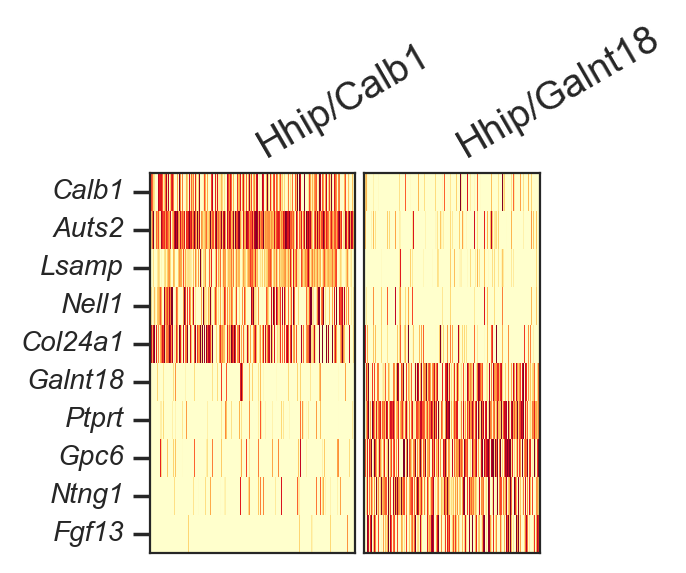

In [53]:
rcParams['figure.figsize'] = 2.5, 2.5
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios':[455,391]})
types = ['Hhip/Calb1', 'Hhip/Galnt18']
cluster = types
vmax = 0.7
vmin = 0
g = sns.heatmap(df[df['subclusters'].isin([cluster[0]])].iloc[:, 0:-1].T,
                yticklabels=1,vmax = vmax,vmin = vmin,
                cmap="YlOrRd",cbar=False,ax=axes[0])
g.set_xlabel('')
g.set_title(types[0],
            rotation=30, horizontalalignment='left'
           )
g.tick_params(bottom=False)
i = 1
for lab in g.get_yticklabels():
    lab.set_style("italic")
    lab.set_fontsize(10)
for clust in cluster[1:3]:
    g = sns.heatmap(df[df['subclusters'].isin([cluster[i]])].iloc[:, 0:-1].T,
                    cmap="YlOrRd",vmax = vmax,vmin = vmin,
                    cbar=False,ax=axes[i])
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_yticks([])
    g.set_title(clust,
                rotation=30, horizontalalignment='left'
               )
    g.tick_params(bottom=False)
    i = i+1
fig.subplots_adjust(wspace=0.05)
sns.despine(top = False, right = False, left = False,bottom = False)
for ax in axes:
    ax.set_xticklabels('')


plt.savefig('hhip_subtypes_heatmap.pdf',dpi = 300)
plt.show()

In [54]:
mdata = pd.read_csv('Morpholoy_data.csv',index_col = 'Cell')
mfeatures = ['branch_points',
 'width',
 'depth',
 'width_depth_ratio',
 'squareness',
 'height',
 'tips',
 'stems',
 'total_length',
 'avg_thickness',
 'max_thickness',
 'total_surface',
 'total_volume',
 'max_path_dist_to_soma',
 'max_branch_order',
 'max_path_angle',
 'min_path_angle',
 'median_path_angle',
 'mean_soma_exit_angle',
 'max_segment_path_length',
 'median_intermediate_segment_pl',
 'median_terminal_segment_pl',
 'log_max_tortuosity',
 'log_min_tortuosity',
 'log_median_tortuosity',
 'max_branch_angle',
 'min_branch_angle',
 'mean_branch_angle',
 'max_degree',
 'tree_asymmetry',
 'stem_max',
 'stem_mean',
 'stem_min',
 'dist_to_dorsal',
 'soma_perimeter',
 'soma_area',
 'soma_feret_max',
 'soma_feret_min',
 'soma_aspect_ratio',
 'soma_compactness',
 'soma_convexity',
 'soma_form_factor',
 'soma_roundness',
 'soma_solidity',]

In [55]:
for m in mfeatures:
    pba.obs[m] = mdata[m]

In [56]:
bamdata = pba.obs[mfeatures] 
bamdata['mapping_to_reclustered_cluster'] = pba.obs['mapping_to_reclustered_cluster']
bamdata = bamdata.dropna()

                                       0
mean_soma_exit_angle            0.105915
max_path_dist_to_soma           0.083280
soma_feret_min                  0.082862
dist_to_dorsal                  0.081045
soma_compactness                0.077722
max_segment_path_length         0.077581
soma_roundness                  0.076644
stem_max                        0.075644
soma_form_factor                0.074336
median_terminal_segment_pl      0.073565
depth                           0.071767
max_degree                      0.071465
soma_aspect_ratio               0.068344
soma_convexity                  0.064422
total_length                    0.063588
squareness                      0.060965
stem_mean                       0.060133
max_path_angle                  0.058698
height                          0.056322
width                           0.055736
soma_solidity                   0.055556
total_surface                   0.055435
median_path_angle               0.053810
max_branch_order

Text(0.5, 0, 'Variance')

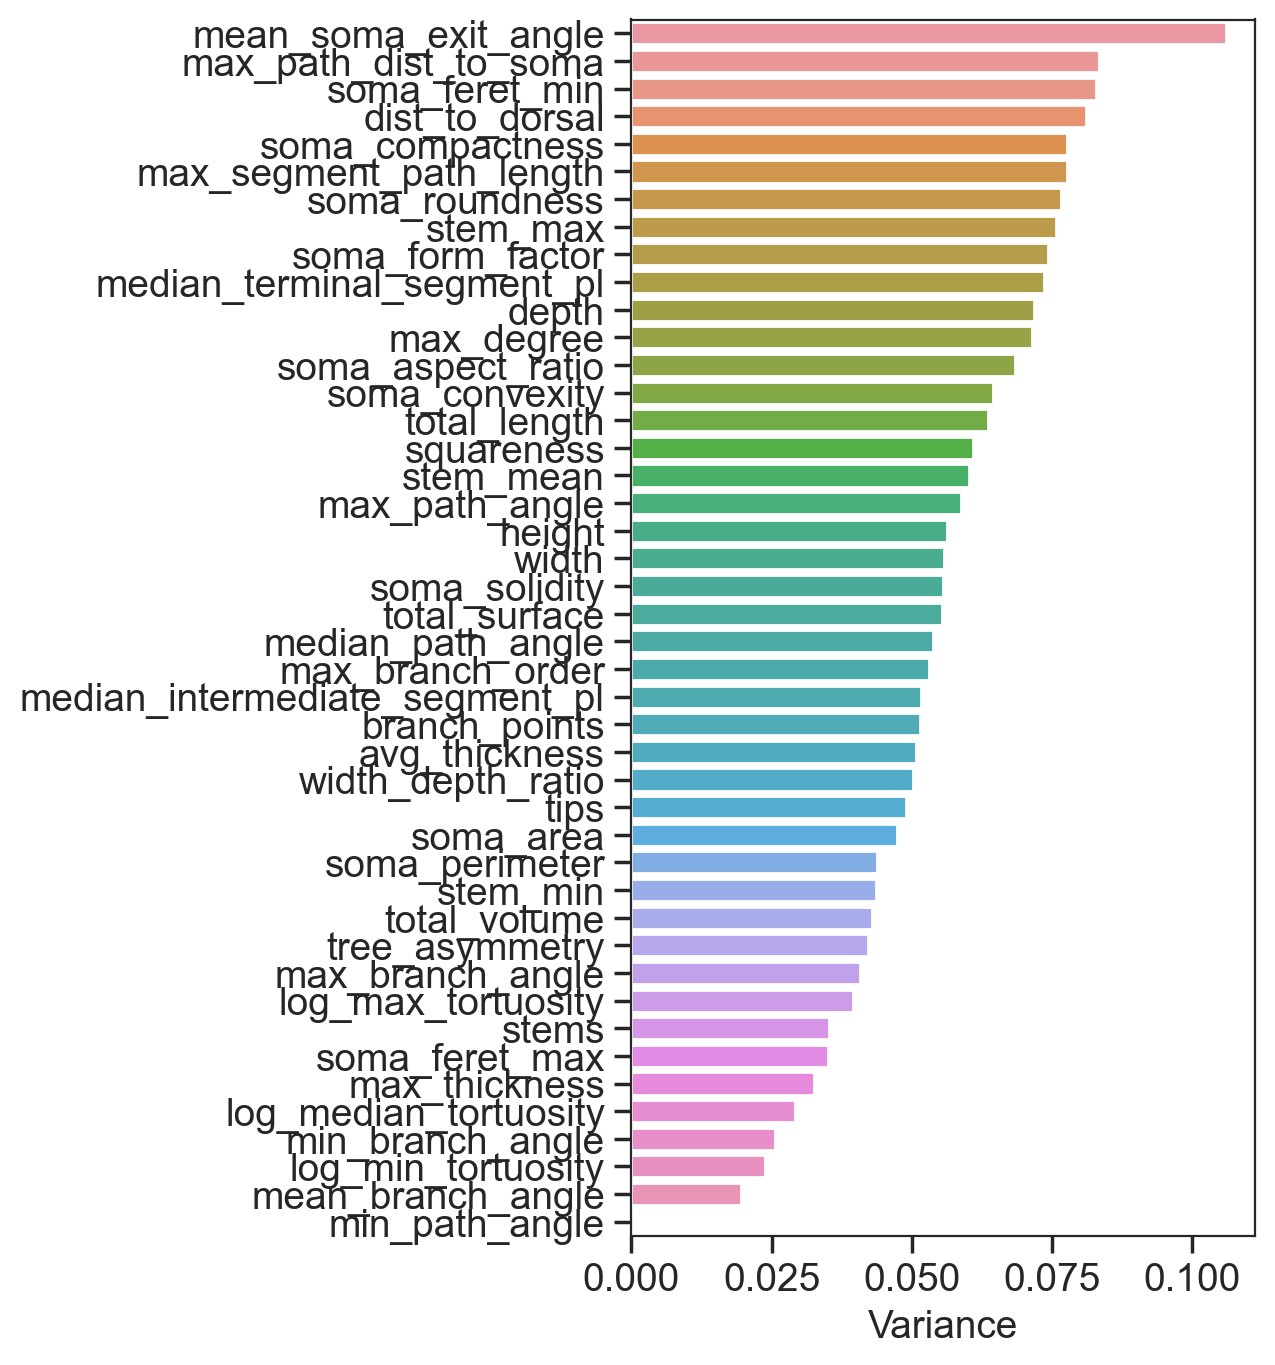

In [57]:
adata = bamdata[mfeatures]
adata = adata - adata.min()
adata = adata/adata.max()
var = pd.DataFrame(adata.var())
var = var.sort_values(by=[0],ascending=False)
print(var)
rcParams['figure.figsize'] = 4, 8
sns.barplot(x= var[0], y = list(var.index))
plt.xlabel('Variance')

([], [])

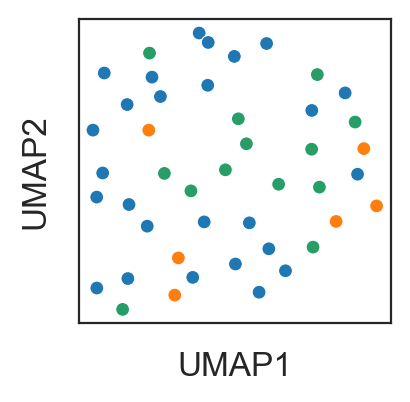

In [58]:
selected_var = var.iloc[0:15]
var_name = list(selected_var.index)
adata = bamdata[var_name]
scaled_features = StandardScaler().fit_transform(adata.values)
embedding = umap.UMAP(random_state = 0, min_dist = 0.4, n_components = 2, n_neighbors = 10).fit_transform(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = bamdata['mapping_to_reclustered_cluster'],
              # palette = {'Bushy_Atoh7': 'royalblue', 'Bushy_Hhip': 'skyblue'},
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('Bushy-e-cluster.png',dpi = 300)

In [59]:
bhmdata = pbh.obs[mfeatures] 
bhmdata['mapping_to_reclustered_cluster'] = pbh.obs['mapping_to_reclustered_cluster']
bhmdata = bhmdata.dropna()

                                       0
max_degree                      0.263158
soma_aspect_ratio               0.118428
mean_soma_exit_angle            0.112814
stems                           0.106725
soma_convexity                  0.100409
avg_thickness                   0.099178
soma_compactness                0.097875
soma_roundness                  0.096768
squareness                      0.093034
soma_form_factor                0.091982
soma_feret_min                  0.088579
stem_max                        0.085177
max_path_dist_to_soma           0.084204
soma_area                       0.079866
median_path_angle               0.077097
max_segment_path_length         0.074019
median_intermediate_segment_pl  0.073098
log_min_tortuosity              0.071383
min_branch_angle                0.070867
depth                           0.069024
stem_mean                       0.067895
total_volume                    0.067699
max_branch_order                0.066999
total_surface   

Text(0.5, 0, 'Variance')

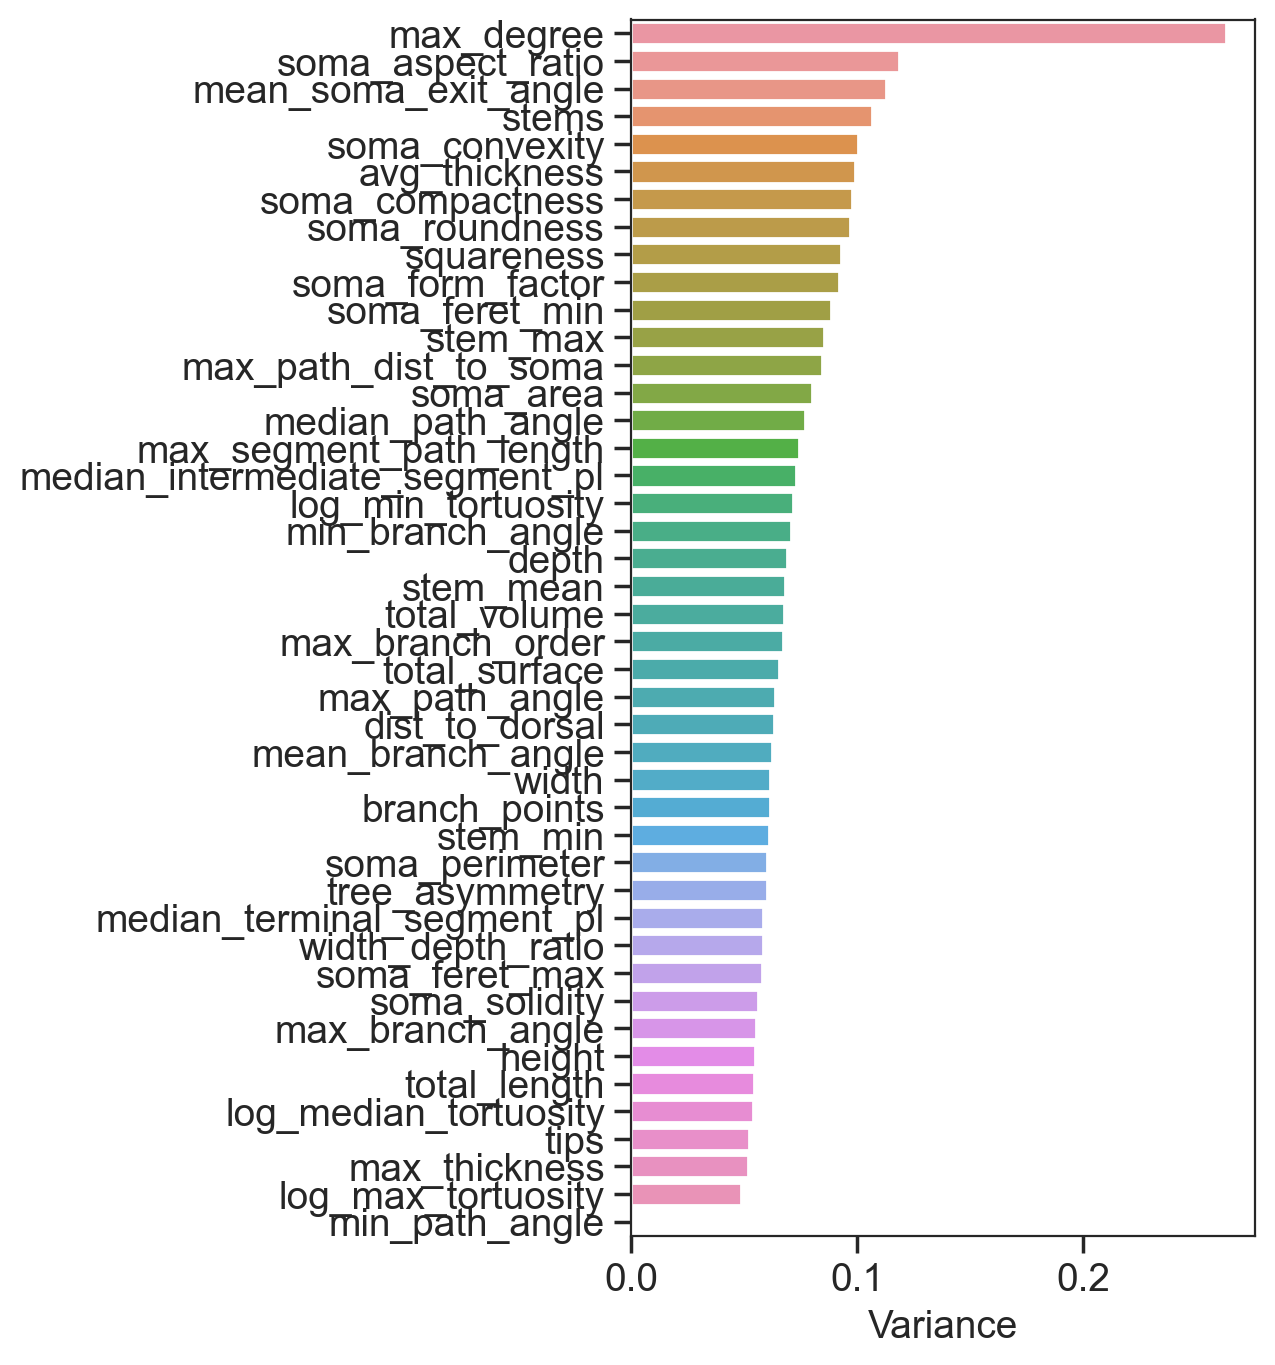

In [60]:
adata = bhmdata[mfeatures]
adata = adata - adata.min()
adata = adata/adata.max()
var = pd.DataFrame(adata.var())
var = var.sort_values(by=[0],ascending=False)
print(var)
rcParams['figure.figsize'] = 4, 8
sns.barplot(x= var[0], y = list(var.index))
plt.xlabel('Variance')

([], [])

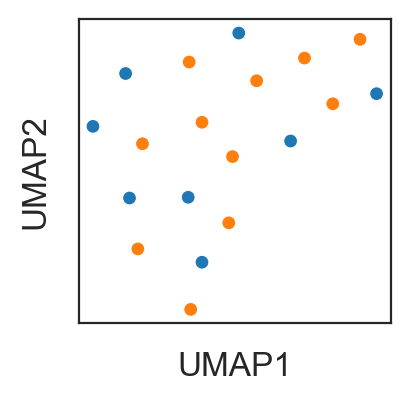

In [61]:
selected_var = var.iloc[0:15]
var_name = list(selected_var.index)
adata = bhmdata[var_name]
scaled_features = StandardScaler().fit_transform(adata.values)
embedding = umap.UMAP(random_state = 0, min_dist = 0.4, n_components = 2, n_neighbors = 10).fit_transform(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = bhmdata['mapping_to_reclustered_cluster'],
              # palette = {'Bushy_Atoh7': 'royalblue', 'Bushy_Hhip': 'skyblue'},
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('Bushy-e-cluster.png',dpi = 300)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Atoh7/Sorcs3 v.s. Atoh7/Tox: t-test independent samples with Bonferroni correction, P_val=2.835e-02 stat=-2.233e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Atoh7/Sorcs3 v.s. Atoh7/Dchs2: t-test independent samples with Bonferroni correction, P_val=1.238e-05 stat=-4.939e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Atoh7/Tox v.s. Atoh7/Dchs2: t-test independent samples with Bonferroni correction, P_val=1.903e-13 stat=-8.627e+00


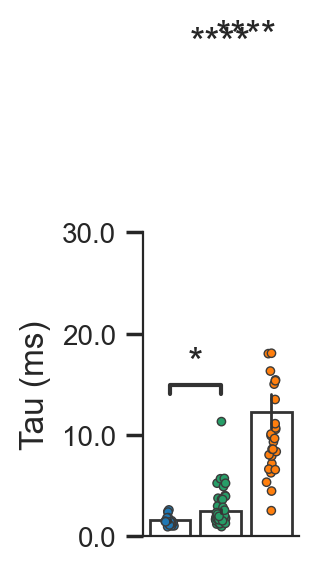

In [34]:
feature = 'Tau (ms)'
palette = {'Atoh7/Tox':'#279e68', 'Atoh7/Sorcs3':'#1f77b4', 'Atoh7/Dchs2':'#ff7f0e'}
rcParams['figure.figsize'] = 1, 2
x = pba.obs["mapping_to_reclustered_cluster"]
y = pba.obs[feature]
order = [ 'Atoh7/Sorcs3','Atoh7/Tox', 'Atoh7/Dchs2']
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2",
                 order=order,
                linewidth=1.0,ci=68,errwidth = 1.0)
ax = sns.stripplot(x =x , y = y,size=3.0,linewidth=0.5,
                   order=order,
                  palette=palette,
                   zorder=1,)
for l in list(combinations(order,2)):
    a = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[0]])][feature].dropna()
    b = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[1]])][feature].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    if p < 0.05:
        add_stat_annotation(ax, x=x, y=y, order=order,
                        box_pairs=[l],
                       test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
plt.ylabel(feature, size=12)
plt.ylim(0,30)
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticks(), size = 10)
sns.despine()
plt.savefig('test/fig/atoh_'+feature+'.pdf',dpi=300,bbox_inches = "tight")
#plt.clf()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Atoh7/Tox v.s. Atoh7/Dchs2: t-test independent samples with Bonferroni correction, P_val=8.570e-05 stat=-4.410e+00


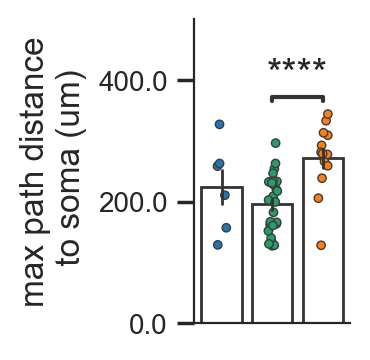

In [26]:
feature = 'max_path_dist_to_soma'
palette = {'Atoh7/Tox':'#279e68', 'Atoh7/Sorcs3':'#1f77b4', 'Atoh7/Dchs2':'#ff7f0e'}
rcParams['figure.figsize'] = 1, 2
x = pba.obs["mapping_to_reclustered_cluster"]
y = pba.obs[feature]
order = [ 'Atoh7/Sorcs3','Atoh7/Tox', 'Atoh7/Dchs2']
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2",
                 order=order,
                linewidth=1.0,ci=68,errwidth = 1.0)
ax = sns.stripplot(x =x , y = y,size=3.0,linewidth=0.5,
                   order=order,
                  palette=palette,
                   zorder=1,)
for l in list(combinations(order,2)):
    a = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[0]])][feature].dropna()
    b = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[1]])][feature].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    if p < 0.05:
        add_stat_annotation(ax, x=x, y=y, order=order,
                        box_pairs=[l],
                       test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
plt.ylabel("max path distance\n to soma (um)", size=12)
plt.ylim(0,500)
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticks(), size = 10)
sns.despine()
#plt.savefig('test/fig/atoh_'+feature+'.pdf',dpi=300,bbox_inches = "tight")
#plt.clf()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Atoh7/Sorcs3 v.s. Atoh7/Tox: t-test independent samples with Bonferroni correction, P_val=1.924e-02 stat=2.474e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Atoh7/Tox v.s. Atoh7/Dchs2: t-test independent samples with Bonferroni correction, P_val=1.145e-03 stat=-3.526e+00


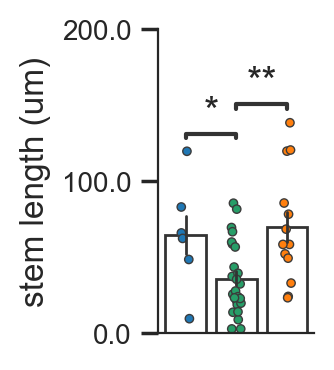

In [137]:
feature = 'stem_mean'
palette = {'Atoh7/Tox':'#279e68', 'Atoh7/Sorcs3':'#1f77b4', 'Atoh7/Dchs2':'#ff7f0e'}
rcParams['figure.figsize'] = 1, 2
x = pba.obs["mapping_to_reclustered_cluster"]
y = pba.obs[feature]
order = [ 'Atoh7/Sorcs3','Atoh7/Tox', 'Atoh7/Dchs2']
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2",
                 order=order,
                linewidth=1.0,ci=68,errwidth = 1.0)
ax = sns.stripplot(x =x , y = y,size=3.0,linewidth=0.5,
                   order=order,
                  palette=palette,
                   zorder=1,)
for l in list(combinations(order,2)):
    a = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[0]])][feature].dropna()
    b = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[1]])][feature].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    if p < 0.05:
        add_stat_annotation(ax, x=x, y=y, order=order,
                        box_pairs=[l],
                       test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
plt.ylabel("stem length (um)", size=12)
plt.ylim(0,200)
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticks(), size = 10)
sns.despine()
plt.savefig('test/fig/atoh_'+feature+'.pdf',dpi=300,bbox_inches = "tight")
#plt.clf()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Atoh7/Tox v.s. Atoh7/Dchs2: t-test independent samples with Bonferroni correction, P_val=8.570e-05 stat=-4.410e+00


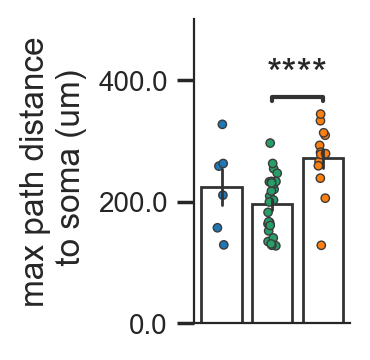

In [141]:
feature = 'max_path_dist_to_soma'
palette = {'Atoh7/Tox':'#279e68', 'Atoh7/Sorcs3':'#1f77b4', 'Atoh7/Dchs2':'#ff7f0e'}
rcParams['figure.figsize'] = 1, 2
x = pba.obs["mapping_to_reclustered_cluster"]
y = pba.obs[feature]
order = [ 'Atoh7/Sorcs3','Atoh7/Tox', 'Atoh7/Dchs2']
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2",
                 order=order,
                linewidth=1.0,ci=68,errwidth = 1.0)
ax = sns.stripplot(x =x , y = y,size=3.0,linewidth=0.5,
                   order=order,
                  palette=palette,
                   zorder=1,)
for l in list(combinations(order,2)):
    a = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[0]])][feature].dropna()
    b = pba.obs[pba.obs['mapping_to_reclustered_cluster'].isin([l[1]])][feature].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    if p < 0.05:
        add_stat_annotation(ax, x=x, y=y, order=order,
                        box_pairs=[l],
                       test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
plt.ylabel("max path distance\n to soma (um)", size=12)
plt.ylim(0,500)
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticks(), size = 10)
sns.despine()
plt.savefig('test/fig/atoh_'+feature+'.pdf',dpi=300,bbox_inches = "tight")
#plt.clf()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Hhip/Galnt18 v.s. Hhip/Calb1: t-test independent samples with Bonferroni correction, P_val=5.932e-03 stat=-3.143e+00


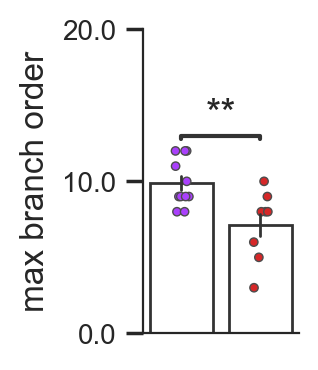

In [154]:
palette = {'Hhip/Calb1':'#aa40fc', 'Hhip/Galnt18':'#d62728'}
rcParams['figure.figsize'] = 1, 2
feature = 'max_branch_order'
x = pbh.obs["mapping_to_reclustered_cluster"]
y = pbh.obs[feature]
order = ['Hhip/Calb1','Hhip/Galnt18']
ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2",
                 order=order,
                linewidth=1.0,ci=68,errwidth = 1.0)
ax = sns.stripplot(x =x , y = y,size=3.0,linewidth=0.5,
                   order=order,
                  palette=palette,
                   zorder=1,)
a = pbh.obs[pbh.obs['mapping_to_reclustered_cluster'].isin(['Hhip/Calb1'])][feature].dropna()
b = pbh.obs[pbh.obs['mapping_to_reclustered_cluster'].isin(['Hhip/Galnt18'])][feature].dropna()
s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
if p < 0.05:
    add_stat_annotation(ax, x=x, y=y,# order=order,
                    box_pairs=[('Hhip/Calb1','Hhip/Galnt18')],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

plt.xlabel("")
plt.ylabel("max branch order", size=12)
plt.ylim(0,20)
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticks(), size = 10)
sns.despine()
plt.savefig('test/fig/hhip_'+feature+'.pdf',dpi=300,bbox_inches = "tight")
# plt.clf()

In [116]:
palette = {'Hhip/Calb1':'#aa40fc', 'Hhip/Galnt18':'#d62728'}
for feature in mfeatures[1:]:
    rcParams['figure.figsize'] = 1, 2
    #feature = 'stem_max'
    x = pbh.obs["mapping_to_reclustered_cluster"]
    y = pbh.obs[feature]
    order = ['Hhip/Calb1','Hhip/Galnt18']
    ax = sns.barplot(x = x, y = y, facecolor=(1, 1, 1, 0),
                     errcolor=".2", edgecolor=".2",
                     order=order,
                    linewidth=1.0,ci=68,errwidth = 1.0)
    ax = sns.stripplot(x =x , y = y,size=3.0,linewidth=0.5,
                       order=order,
                      palette=palette,
                       zorder=1,)
    a = pbh.obs[pbh.obs['mapping_to_reclustered_cluster'].isin(['Hhip/Calb1'])][feature].dropna()
    b = pbh.obs[pbh.obs['mapping_to_reclustered_cluster'].isin(['Hhip/Galnt18'])][feature].dropna()
    s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
    if p < 0.05:
        add_stat_annotation(ax, x=x, y=y, order=order,
                        box_pairs=[l],
                       test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

    plt.xlabel("")
    ax.set_yticklabels(ax.get_yticks(), size = 10)
    ax.set_xticks([])
    plt.ylabel(feature, size=12)
    sns.despine()
    plt.savefig('test/hhip/'+feature+'.png',dpi=300,bbox_inches = "tight")
    plt.clf()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Hhip/Calb1 v.s. Hhip/Galnt18: t-test independent samples with Bonferroni correction, P_val=2.362e-02 stat=2.486e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Hhip/Calb1 v.s. Hhip/Galnt18: t-test independent samples with Bonferroni correction, P_val=2.325e-02 stat=2.494e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Hhip/Calb1 v.s. Hhip/Galnt18: t-test independent samples with Bonferroni correction, P_val=2.785e-02 stat=-2.405e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e

<Figure size 100x200 with 0 Axes>